<font color="#CA3532"><h1 align="left">Deep Learning</h1></font>
<font color="#6E6E6E"><h2 align="left">Introducción a Keras: Autoencoders</h2></font>

Un autoencoder es una arquitectura de red neuronal utilizada para eliminar el ruido y la información irrelevante de los datos de entrada. La red está diseñada para aprender a reconstruir los datos de entrada a través de una representación comprimida (o codificación) en una capa intermedia. Este modelo se entrena para generar, a partir de los datos de entrada, la propia entrada:

<p align="center"><img src="https://www.researchgate.net/publication/311995136/figure/fig2/AS:749324690534400@1555664336772/Auto-encoder-Source-Wikipedia.jpg" height="20%"></p>

Entre otras funcionalidades, se incluyen las siguientes:

- **Reducción de dimensionalidad no lineal**: Una vez entrenado el modelo, si nos quedamos con la activación de la capa oculta (hidden en la figura), tenemos una representación con menor dimensionalidad habiendo realizado una transformación no lineal de los datos.

- **Reducción de ruido**: Una vez entrenado el modelo, si nos quedamos con la activación de la capa de salida (output en la figura), tenemos una reconstrucción de nuestro dato de entrada (input) habiendo filtrado lo más relevante para identificar el dato.

- **Generación de datos sintéticos**: Una vez entrenado el modelo, si generamos números aleatorios para introducirlos como entrada a la capa de decodificación, estaremos generando nuevos datos.

- **Detección de anomalías**: Si un autoencoder se entrena con datos "normales", cuando aparece un dato anómalo o extraño, la reconstrucción del autoencoder será deficiente. Puede ser un indicativo de que algo está fallando con el dato de entrada.

Vamos a explorar cómo funciona un autoencoder en Keras con dos problemas: **MNIST** y **Activos financieros**.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil
import yfinance as yf

# <font color="#CA3532">MNIST</font>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


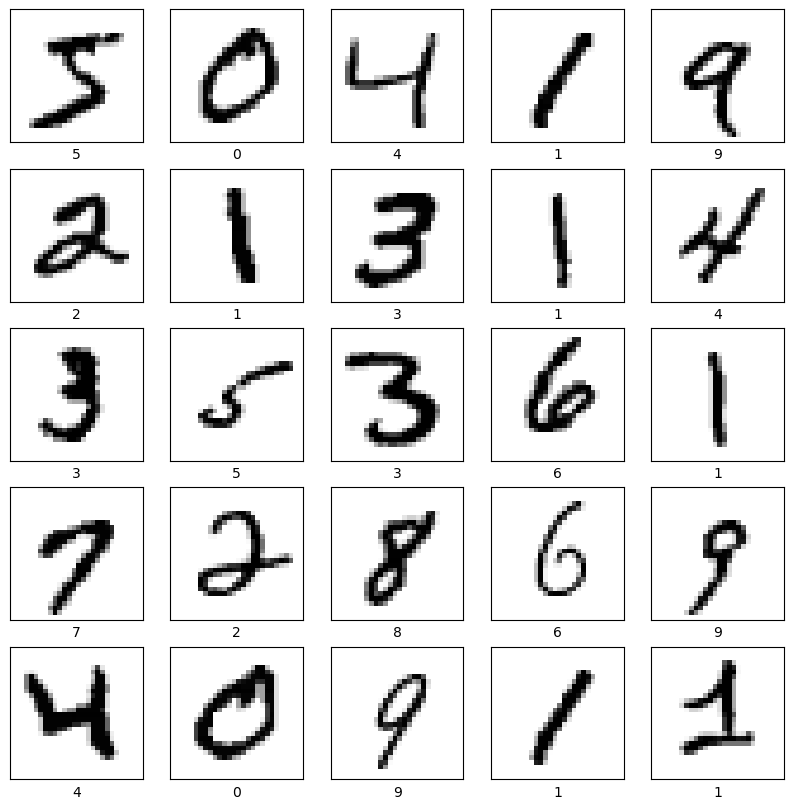

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

**Preprocesamiento de datos**

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

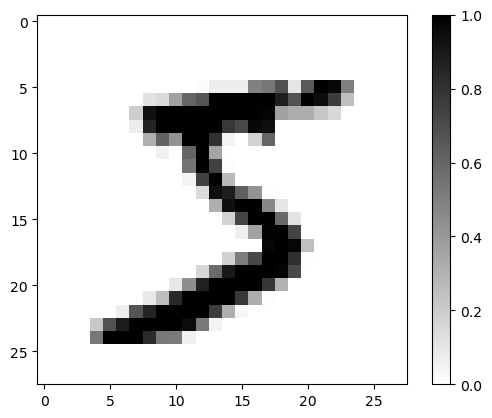

In [ ]:
plt.imshow(train_images[0], plt.cm.binary, vmin=0, vmax=1)
plt.colorbar()
plt.show()

## <font color="#CA3532">Diseño del modelo</font>

In [ ]:
input_layer = tf.keras.layers.Input(shape=(28,28))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
encoded_layer = tf.keras.layers.Dense(256, activation="relu")(flatten_layer)
decoded_layer = tf.keras.layers.Dense(784, activation="linear")(encoded_layer)

2023-12-01 17:08:13.195311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 17:08:13.227151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 17:08:13.227382: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## <font color="#CA3532">Entrenamiento del modelo</font>

In [ ]:
batch_size = 100
learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoded_layer)
autoencoder.compile(optimizer=optimizer, loss="mean_squared_error")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
Total params: 402448 (1.54 MB)
Trainable params: 402448 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = autoencoder.fit(train_images, train_images.reshape(-1, 28*28),
                    batch_size=batch_size,
                    validation_data=(test_images, test_images.reshape(-1, 28*28)),
                    epochs=30)

Epoch 1/30


2023-12-01 17:08:14.625656: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x778a620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-01 17:08:14.625682: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 970, Compute Capability 5.2
2023-12-01 17:08:14.629729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-01 17:08:14.643944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-01 17:08:14.762810: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 2s 2ms/step - loss: 0.0177 - val_loss: 0.0071
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 11/3

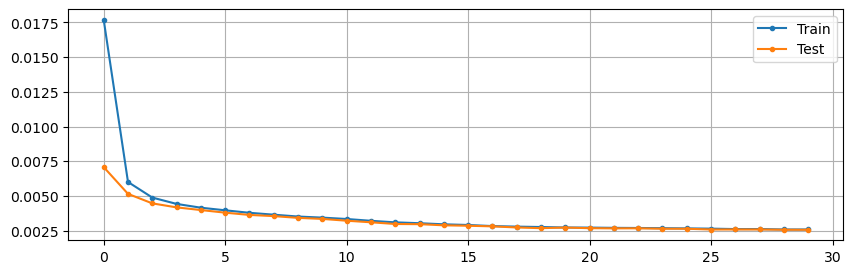

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(h.history["loss"], '.-', label="Train")
plt.plot(h.history["val_loss"], '.-', label="Test")
plt.legend()
plt.grid()
plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(train_images)

1875/1875 [==============================] - 2s 827us/step


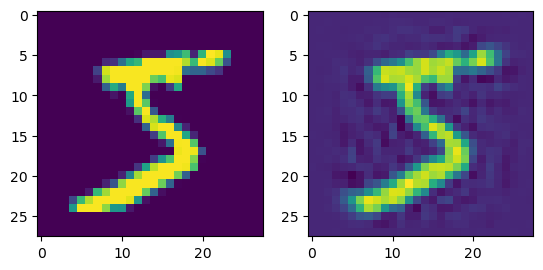

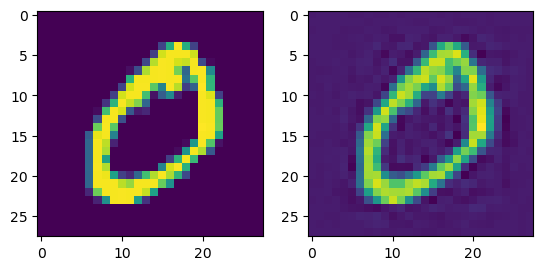

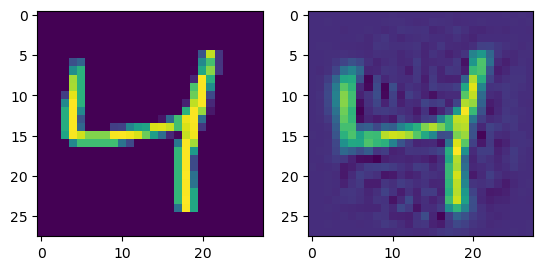

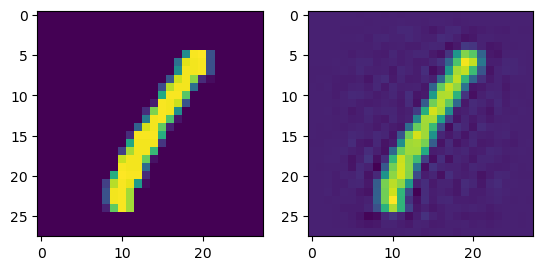

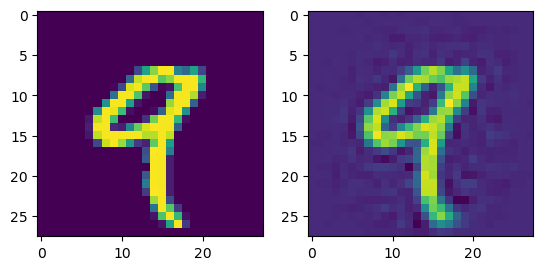

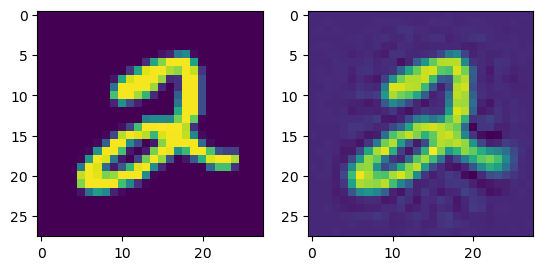

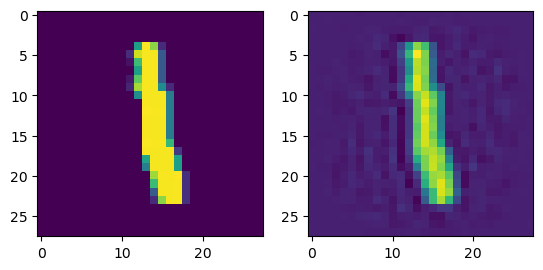

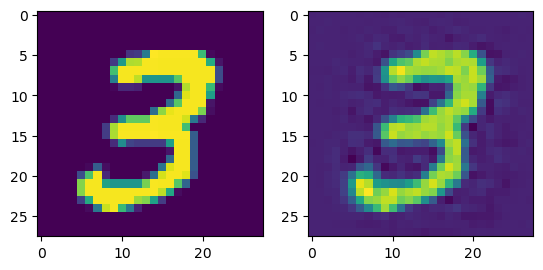

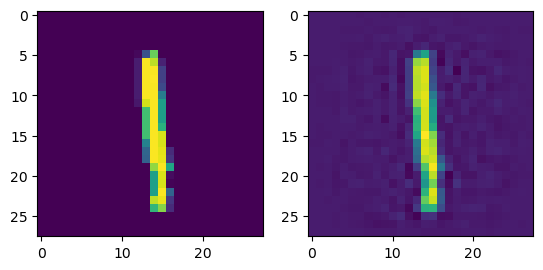

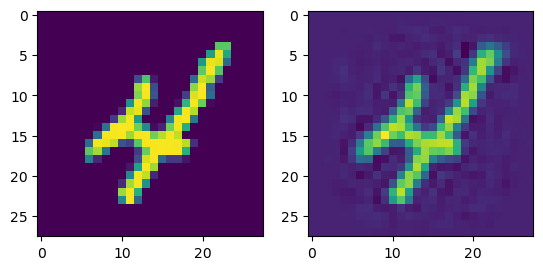

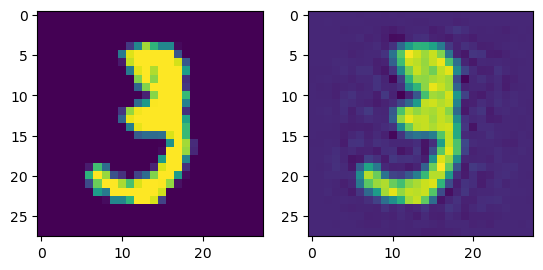

In [ ]:
for i, (original, decoded) in enumerate(zip(train_images, decoded_imgs)):
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.subplot(1,2,2)
    plt.imshow(decoded.reshape(28,28))
    plt.show()
    if i == 10:
        break

# <font color="#CA3532">Activos</font>

Tenemos una lista de activos. Vamos a procesarlos.

In [2]:
lista_activos = ['A', 'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'ADM', 'ADSK',
                 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AKAM', 'ALL', 'ALLE',
                 'AMAT', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AON', 'APA', 'APD',
                 'APH', 'APTV', 'AVB', 'AVGO', 'AVY', 'AXP', 'AZO', 'BA', 'BAC',
                 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BK', 'BKNG',
                 'BLK', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH',
                 'CAT', 'CB', 'CBRE', 'CCI', 'CCL', 'CF', 'CHRW', 'CI', 'CINF',
                 'CL', 'CLX', 'CMA', 'CMCSA', 'CMG', 'CMI', 'CMS', 'CNP', 'COF',
                 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CTAS', 'CTRA', 'CTSH',
                 'CVS', 'CVX', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR',
                 'DIS', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'EA', 'EBAY',
                 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'ELV', 'EMN', 'EMR', 'EOG', 'EQR',
                 'EQT', 'ES', 'ESS', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'F',
                 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FI', 'FIS', 'FITB', 'FMC',
                 'FSLR', 'GD', 'GE', 'GEN', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GOOG',
                 'GOOGL', 'GPC', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HD', 'HES', 'HIG',
                 'HON', 'HPQ', 'HRL', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IFF', 'INTC',
                 'INTU', 'IP', 'IPG', 'IRM', 'ISRG', 'ITW', 'IVZ', 'JCI', 'JNJ',
                 'JNPR', 'JPM', 'K', 'KDP', 'KEY', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX',
                 'KO', 'KR', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LLY', 'LMT', 'LNC',
                 'LOW', 'LRCX', 'LUV', 'LYB', 'MA', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO',
                 'MDT', 'MET', 'META', 'MHK', 'MKC', 'MLM', 'MMC', 'MMM', 'MO', 'MOS',
                 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'NDAQ', 'NEE', 'NEM',
                 'NFLX', 'NI', 'NKE', 'NOC', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE',
                 'NVDA', 'NWL', 'NWSA', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PARA',
                 'PAYX', 'PCAR', 'PCG', 'PEG', 'PFE', 'PG', 'PGR', 'PH', 'PHM',
                 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX',
                 'PTC', 'PWR', 'PXD', 'QCOM', 'RCL', 'RF', 'RHI', 'RL', 'ROK', 'ROP',
                 'ROST', 'RSG', 'RTX', 'RVTY', 'SBUX', 'SCHW', 'SEE', 'SHW', 'SJM',
                 'SLB', 'SNA', 'SO', 'SPG', 'SPGI', 'SRE', 'STT', 'STX', 'STZ', 'SWK',
                 'SYK', 'SYY', 'T', 'TAP', 'TEL', 'TFC', 'TGT', 'TJX', 'TMO', 'TPR',
                 'TROW', 'TRV', 'TSCO', 'TSN', 'TT', 'TXT', 'UHS', 'UNH', 'UNP', 'UPS',
                 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VRSN', 'VTR', 'VZ', 'WAT',
                 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB', 'WMT', 'WY', 'WYNN', 'XOM',
                 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [3]:
precios = yf.download(lista_activos, start="2022-01-01", end="2023-01-01")["Adj Close"]
retornos = np.log(precios).diff().dropna()

[*********************100%%**********************]  326 of 326 completed


Vamos a hacer una exploración sencilla de los activos. Para ello, vamos a aplicar PCA sobre la matriz de correlación para intentar representar los activos en 2D.

In [4]:
matriz_corr = retornos.corr()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(matriz_corr)

Con esta transformación, mantenemos un 72.96% de la varianza explicada.

In [6]:
pca.explained_variance_ratio_.sum()

0.7296792950646884

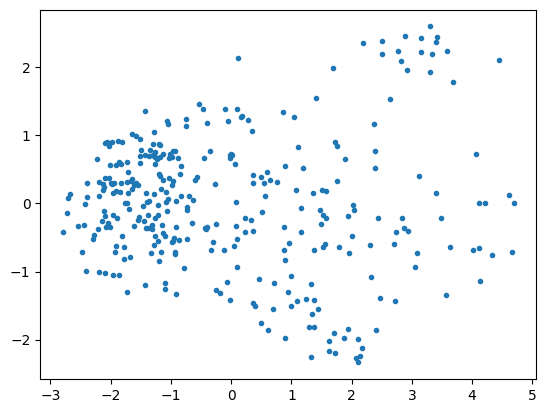

In [7]:
plt.plot(pca_2d[:, 0], pca_2d[:, 1], '.')
plt.show()

## <font color="#CA3532">Autoencoder como reducción de dimensionalidad</font>

In [8]:
input_layer = tf.keras.layers.Input(shape=(matriz_corr.shape[1]))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
encoded_layer = tf.keras.layers.Dense(2, activation="relu", bias_initializer="ones")(flatten_layer)
decoded_layer = tf.keras.layers.Dense(matriz_corr.shape[1], activation="linear")(encoded_layer)

In [9]:
batch_size = 20
learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [10]:
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoded_layer)
autoencoder.compile(optimizer=optimizer, loss="mean_squared_error")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 326)]             0         
                                                                 
 flatten (Flatten)           (None, 326)               0         
                                                                 
 dense (Dense)               (None, 2)                 654       
                                                                 
 dense_1 (Dense)             (None, 326)               978       
                                                                 
Total params: 1632 (6.38 KB)
Trainable params: 1632 (6.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
h = autoencoder.fit(matriz_corr, matriz_corr,
                    batch_size=batch_size,
                    epochs=200)

Epoch 1/200
17/17 [==============================] - 2s 5ms/step - loss: 0.1835
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1024
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0658
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0399
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0246
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 12/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 13/200
17/17 [=================

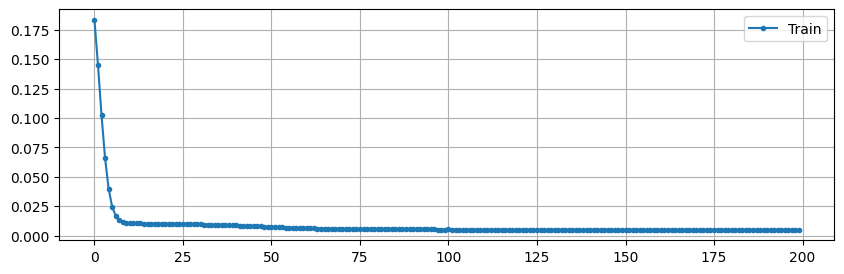

In [12]:
plt.figure(figsize=(10, 3))
plt.plot(h.history["loss"], '.-', label="Train")
plt.legend()
plt.grid()
plt.show()

In [13]:
matriz_corr_decoded = autoencoder.predict(matriz_corr)

11/11 [==============================] - 0s 3ms/step


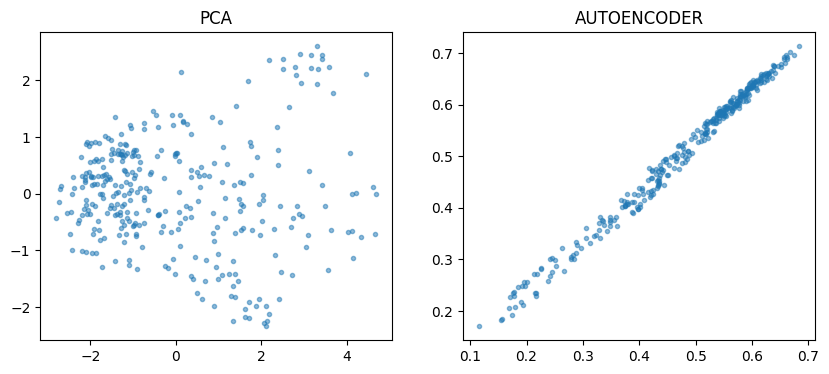

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("PCA")
plt.plot(pca_2d[:, 0], pca_2d[:, 1], '.', alpha=0.5)
plt.subplot(1,2,2)
plt.title("AUTOENCODER")
plt.plot(matriz_corr_decoded[:, 0], matriz_corr_decoded[:, 1], '.', alpha=0.5)
plt.show()

## <font color="#CA3532">Autoencoder como Denoising</font>

In [15]:
input_layer = tf.keras.layers.Input(shape=(matriz_corr.shape[1]))
flatten_layer = tf.keras.layers.Flatten()(input_layer)
encoded_layer = tf.keras.layers.Dense(20, activation="relu", bias_initializer="ones")(flatten_layer)
decoded_layer = tf.keras.layers.Dense(matriz_corr.shape[1], activation="linear")(encoded_layer)

In [16]:
batch_size = 20
learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [17]:
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoded_layer)
autoencoder.compile(optimizer=optimizer, loss="mean_squared_error")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 326)]             0         
                                                                 
 flatten_1 (Flatten)         (None, 326)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                6540      
                                                                 
 dense_3 (Dense)             (None, 326)               6846      
                                                                 
Total params: 13386 (52.29 KB)
Trainable params: 13386 (52.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
h = autoencoder.fit(matriz_corr, matriz_corr,
                    batch_size=batch_size,
                    epochs=200)

Epoch 1/200
17/17 [==============================] - 1s 4ms/step - loss: 0.1870
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0863
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0343
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 12/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 13/200
17/17 [=================

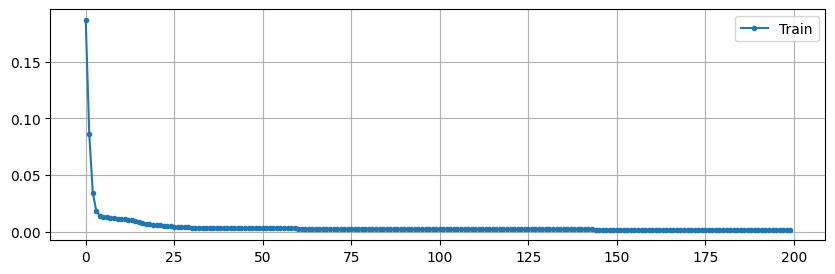

In [19]:
plt.figure(figsize=(10, 3))
plt.plot(h.history["loss"], '.-', label="Train")
plt.legend()
plt.grid()
plt.show()

In [20]:
matriz_corr_decoded = autoencoder.predict(matriz_corr)

11/11 [==============================] - 0s 3ms/step


In [21]:
pca_decoded = PCA(n_components=2)
pca_2d_decoded = pca_decoded.fit_transform(matriz_corr_decoded)

In [22]:
pca_decoded.explained_variance_ratio_.sum()

0.7942233

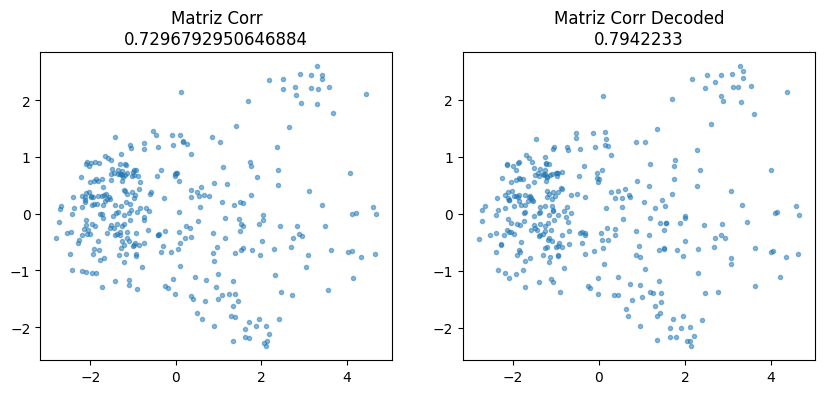

In [23]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Matriz Corr\n"+str(pca.explained_variance_ratio_.sum()))
plt.plot(pca_2d[:, 0], pca_2d[:, 1], '.', alpha=0.5)
plt.subplot(1,2,2)
plt.title("Matriz Corr Decoded\n"+str(pca_decoded.explained_variance_ratio_.sum()))
plt.plot(pca_2d_decoded[:, 0], pca_2d_decoded[:, 1], '.', alpha=0.5)
plt.show()

In [24]:
encoder = tf.keras.Model(inputs=input_layer, outputs=encoded_layer)
encoder.compile(optimizer=optimizer, loss="mean_squared_error")
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 326)]             0         
                                                                 
 flatten_1 (Flatten)         (None, 326)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                6540      
                                                                 
Total params: 6540 (25.55 KB)
Trainable params: 6540 (25.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
matriz_corr_encoded = encoder.predict(matriz_corr)

11/11 [==============================] - 0s 2ms/step


In [26]:
pca_encoded = PCA(n_components=2)
pca_2d_encoded = pca_encoded.fit_transform(matriz_corr_encoded)

In [27]:
pca_encoded.explained_variance_ratio_.sum()

0.6982861

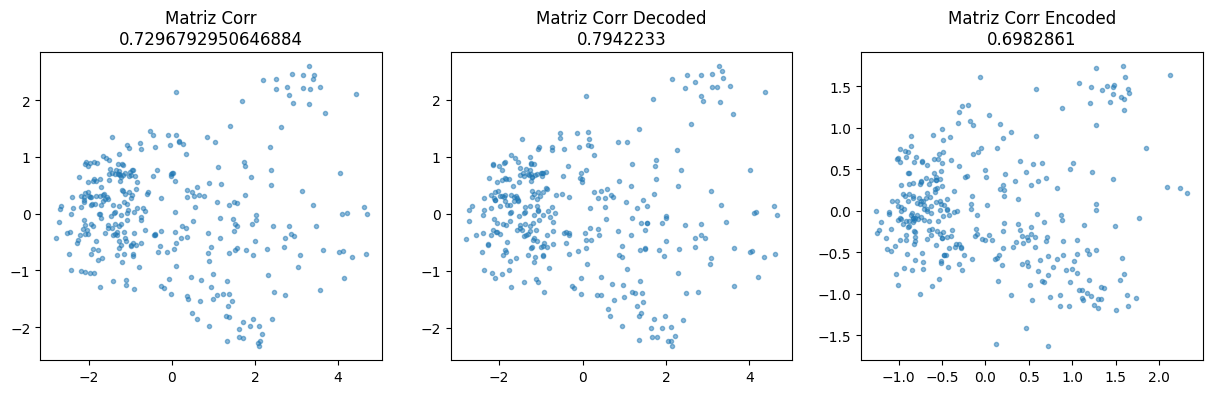

In [28]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.title("Matriz Corr\n"+str(pca.explained_variance_ratio_.sum()))
plt.plot(pca_2d[:, 0], pca_2d[:, 1], '.', alpha=0.5)
plt.subplot(1,3,2)
plt.title("Matriz Corr Decoded\n"+str(pca_decoded.explained_variance_ratio_.sum()))
plt.plot(pca_2d_decoded[:, 0], pca_2d_decoded[:, 1], '.', alpha=0.5)
plt.subplot(1,3,3)
plt.title("Matriz Corr Encoded\n"+str(pca_encoded.explained_variance_ratio_.sum()))
plt.plot(pca_2d_encoded[:, 0], pca_2d_encoded[:, 1], '.', alpha=0.5)

plt.show()

**Preguntas abiertas**

- ¿Qué sucede con la transformación de la matriz de correlación? ¿Qué representa?
- ¿Y si ahora pruebo a hacer HRP o cualquier otra estrategia de clustering con esta nueva matriz de correlación decodificada?
- ¿Los activos que según la matriz de correlación estaban cerca siguen estando cerca ahora?

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan = DBSCAN(eps=0.6, min_samples=8)
clusters = dbscan.fit_predict(matriz_corr_decoded)

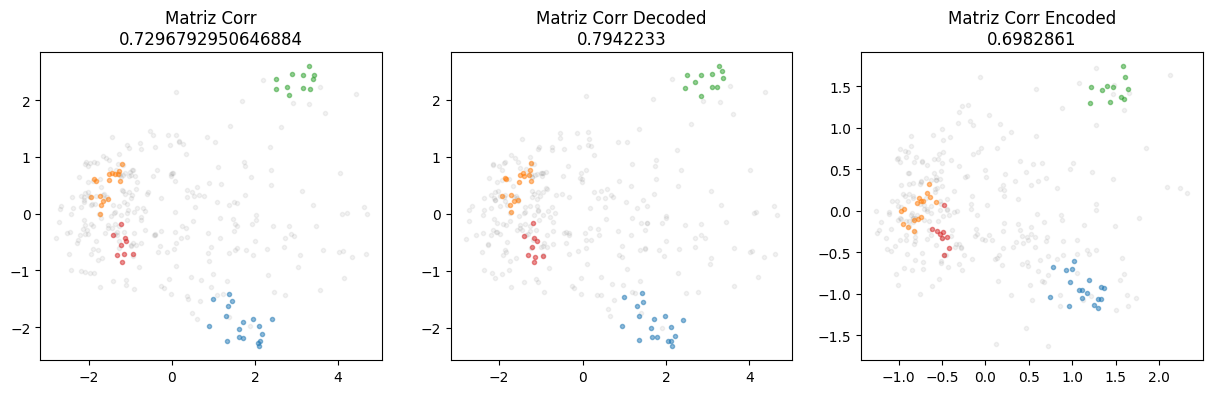

In [32]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.title("Matriz Corr\n"+str(pca.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d[c==clusters, 0], pca_2d[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d[c==clusters, 0], pca_2d[c==clusters, 1], '.', color="gray", alpha=0.1)
plt.subplot(1,3,2)
plt.title("Matriz Corr Decoded\n"+str(pca_decoded.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d_decoded[c==clusters, 0], pca_2d_decoded[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d_decoded[c==clusters, 0], pca_2d_decoded[c==clusters, 1], '.', color="gray", alpha=0.1)
plt.subplot(1,3,3)
plt.title("Matriz Corr Encoded\n"+str(pca_encoded.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d_encoded[c==clusters, 0], pca_2d_encoded[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d_encoded[c==clusters, 0], pca_2d_encoded[c==clusters, 1], '.', color="gray", alpha=0.1)

plt.show()

In [33]:
dbscan = DBSCAN(eps=1.0, min_samples=8)
clusters = dbscan.fit_predict(matriz_corr)

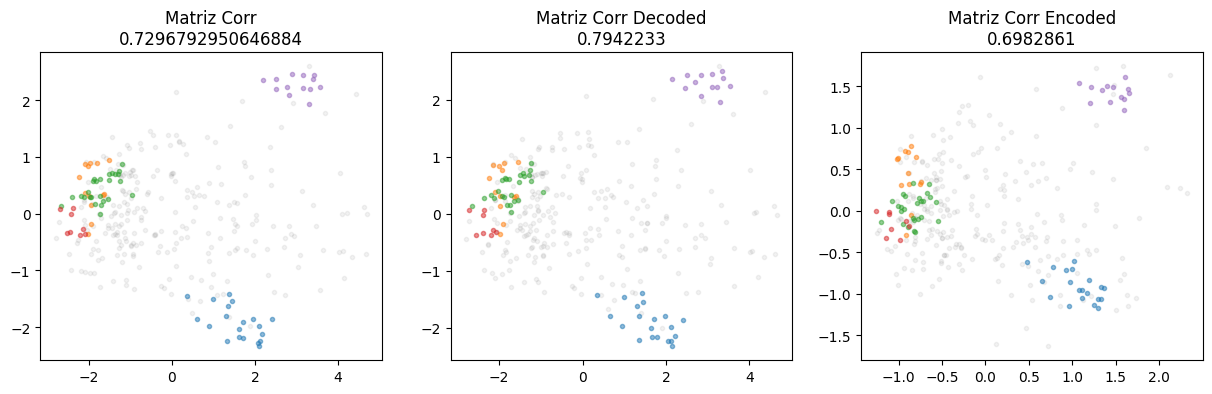

In [34]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.title("Matriz Corr\n"+str(pca.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d[c==clusters, 0], pca_2d[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d[c==clusters, 0], pca_2d[c==clusters, 1], '.', color="gray", alpha=0.1)
plt.subplot(1,3,2)
plt.title("Matriz Corr Decoded\n"+str(pca_decoded.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d_decoded[c==clusters, 0], pca_2d_decoded[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d_decoded[c==clusters, 0], pca_2d_decoded[c==clusters, 1], '.', color="gray", alpha=0.1)
plt.subplot(1,3,3)
plt.title("Matriz Corr Encoded\n"+str(pca_encoded.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d_encoded[c==clusters, 0], pca_2d_encoded[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d_encoded[c==clusters, 0], pca_2d_encoded[c==clusters, 1], '.', color="gray", alpha=0.1)

plt.show()

In [41]:
dbscan = DBSCAN(eps=0.4, min_samples=8)
clusters = dbscan.fit_predict(matriz_corr_encoded)

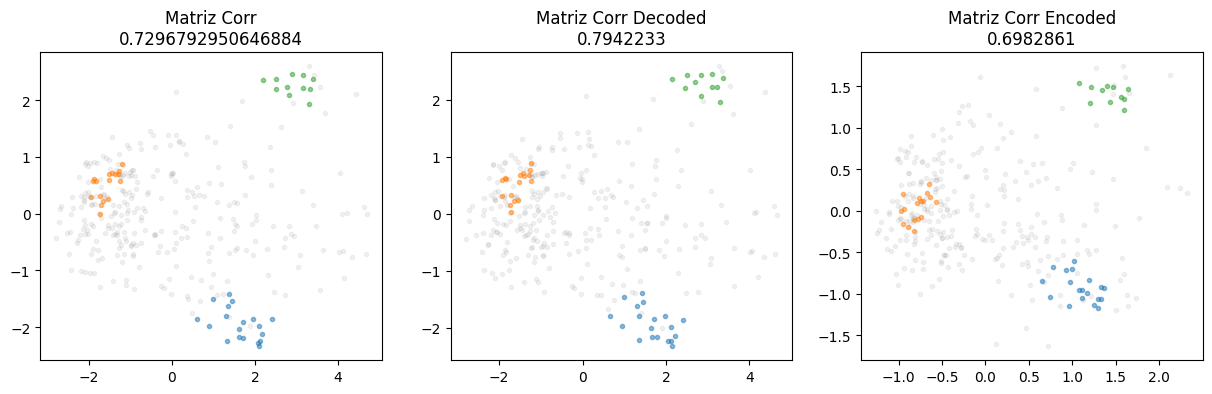

In [42]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.title("Matriz Corr\n"+str(pca.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d[c==clusters, 0], pca_2d[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d[c==clusters, 0], pca_2d[c==clusters, 1], '.', color="gray", alpha=0.1)
plt.subplot(1,3,2)
plt.title("Matriz Corr Decoded\n"+str(pca_decoded.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d_decoded[c==clusters, 0], pca_2d_decoded[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d_decoded[c==clusters, 0], pca_2d_decoded[c==clusters, 1], '.', color="gray", alpha=0.1)
plt.subplot(1,3,3)
plt.title("Matriz Corr Encoded\n"+str(pca_encoded.explained_variance_ratio_.sum()))
for c in np.unique(clusters):
  if c != -1:
    plt.plot(pca_2d_encoded[c==clusters, 0], pca_2d_encoded[c==clusters, 1], '.', alpha=0.5)
  else:
    plt.plot(pca_2d_encoded[c==clusters, 0], pca_2d_encoded[c==clusters, 1], '.', color="gray", alpha=0.1)

plt.show()